In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dw_df = pd.read_csv("../Resources/dropped_water.csv")

dw_df.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
1,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
2,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
3,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0
4,5.584087,188.313324,28748.687739,7.544869,280.467916,8.399735,54.917862,2.559708,0


In [3]:

# Connect to SQLite database (or create if it doesn't exist)
conn = sqlite3.connect('dropped_water.db')

# Write DataFrame to SQLite database
dw_df.to_sql('dropped_water_data', conn, if_exists='replace')

# Commit changes and close connection
conn.commit()
conn.close()

In [4]:
conn = sqlite3.connect('dropped_water.db')

# Read data from SQLite into a Pandas DataFrame
dw_df = pd.read_sql_query("SELECT * FROM dropped_water_data", conn)

# Close the connection
conn.close()

# Display the DataFrame
dw_df.head()

,index,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
1,1,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
2,2,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
3,3,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0
4,4,5.584087,188.313324,28748.687739,7.544869,280.467916,8.399735,54.917862,2.559708,0


# RandomForestClassifier

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [6]:
# Check for missing values and handle them if any
missing_values_count = dw_df.isnull().sum()
missing_values_count

index              0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
# Splitting the dataset into features (X) and target variable (y)
X = dw_df.drop(['index', 'Potability'], axis=1)
y = dw_df['Potability']

In [8]:
y.sum()/dw_df.shape[0]

0.39713099282748204

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initializing the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [11]:
# Training the model
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Predicting the test set results
y_pred = rf_clf.predict(X_test)

Accuracy:0.6113207547169811
F1-Score:0.33974358974358976
Precision:0.48623853211009177
Recall:0.26108374384236455
-----------------------
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       0.64      0.83      0.72       327
           1       0.49      0.26      0.34       203

    accuracy                           0.61       530
   macro avg       0.56      0.54      0.53       530
weighted avg       0.58      0.61      0.58       530

-----------------------
Confusion_Matrix
----------------------


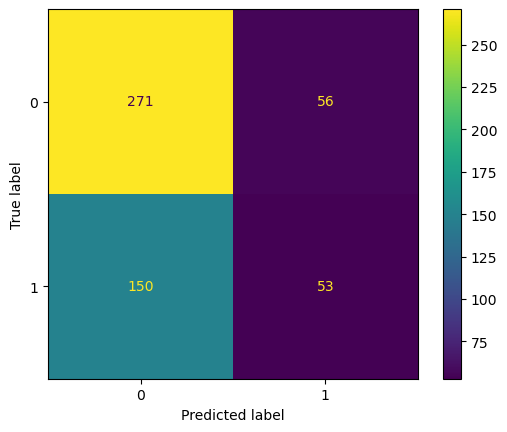

In [13]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy:{accuracy}")
print(f"F1-Score:{f1}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")


print("-----------------------")
print("Classification_Report")
print("-----------------------")
print(class_report)
print("-----------------------")
print("Confusion_Matrix")
print("----------------------")

conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_matrix_display.plot()


# LightGradientBoostingClassifier

In [14]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from lightgbm import LGBMClassifier

In [15]:
X = dw_df.drop(['index', 'Potability'], axis=1)
y = dw_df['Potability']

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize and train the LightGBM classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 849, number of negative: 1270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 2119, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400661 -> initscore=-0.402713
[LightGBM] [Info] Start training from score -0.402713


LGBMClassifier(random_state=42)

In [18]:
# Make predictions
y_pred = lgbm_model.predict(X_test)

Accuracy: 0.5773584905660377
Precision: 0.43636363636363634
Recall: 0.35467980295566504
F1 Score: 0.391304347826087
-----------------------
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       327
           1       0.44      0.35      0.39       203

    accuracy                           0.58       530
   macro avg       0.54      0.54      0.53       530
weighted avg       0.56      0.58      0.57       530

-----------------------
Confusion_Matrix
----------------------


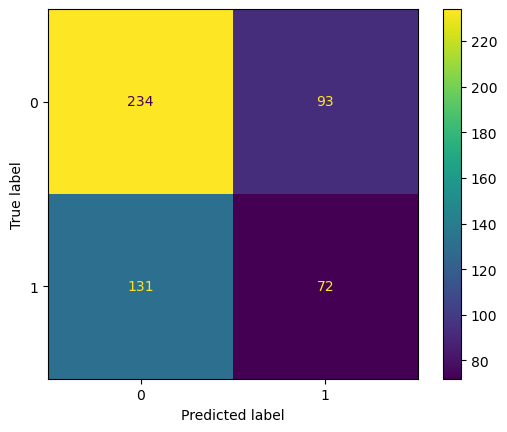

In [19]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


print("-----------------------")
print("Classification_Report")
print("-----------------------")
print(classification_report(y_test, y_pred))
print("-----------------------")
print("Confusion_Matrix")
print("----------------------")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

